#### Feature Description

1) Channel - Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal)  - Target Variable <br>
2) Regions - Lisnon, Oporto or Other (Nominal)                  
3) Fresh - annual spending  on fresh products (Continuous)<br>
4) Milk - annual spending  on milk products (Continuous)<br>
5) Grocery - annual spending on grocery products (Continuous)<br>
6) Frozen - annual spending on frozen products (Continuous) <br>
7) Detergents - annual spending  on detergents and paper products (Continuous) <br>
8) Delicatessen - annual spending on and delicatessen products (Continuous)<br>

In [ ]:
# Lin Reg - Car Sales (LinReg,OLS,SGDRegressor)
# Loan_data - SGDRegressor
# LogReg - bank data (fraud data)
# DT - deposit data
# Taxi Fare - RF

# House Price - 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesale_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [9]:
df.isna().sum()
# df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

### Univariate Analysis

In [10]:
# Target Variable
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [11]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [13]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


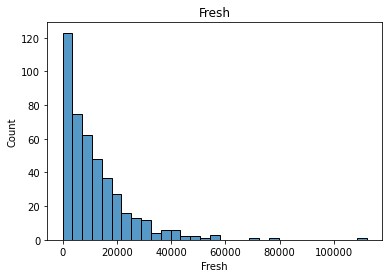

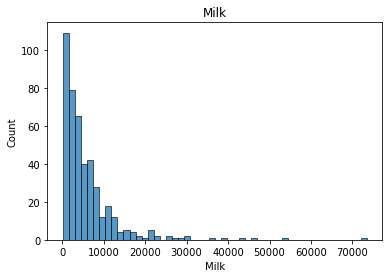

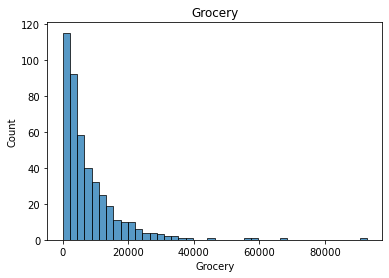

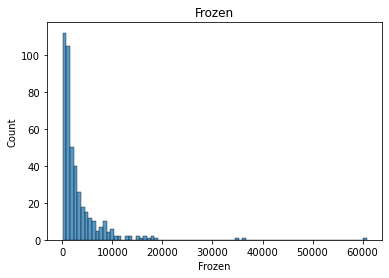

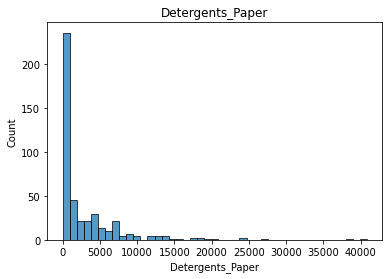

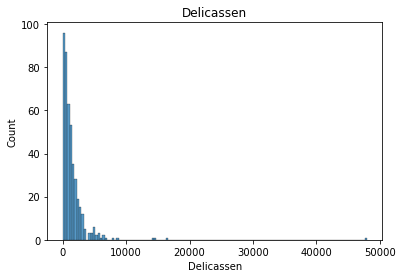

In [17]:
for i in df.iloc[:,2:].columns:  # i=['Fresh','Milk','Grocery','Frozen','Detergent','Delicassen']
    sns.histplot(x=df[i])
    plt.title(i)
    plt.show()

#### Inference
1) All the features are positively skewed

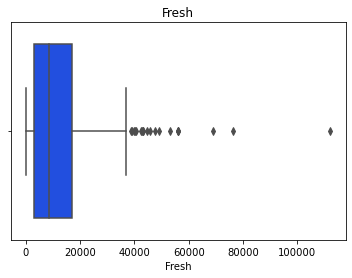

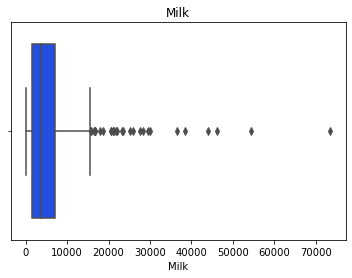

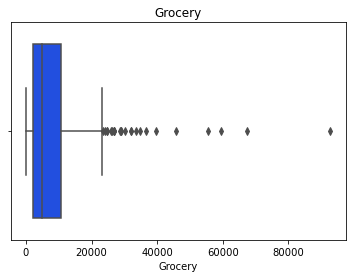

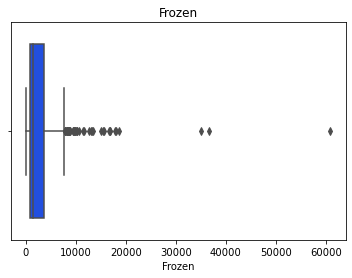

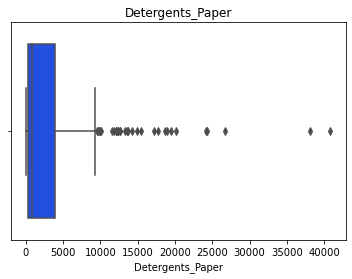

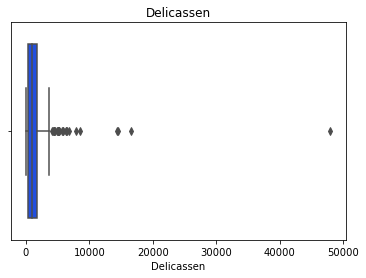

In [34]:
for i in df.iloc[:,2:].columns:  # i=['Fresh','Milk','Grocery','Frozen','Detergent','Delicassen']
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

#### Bi-variate Analysis

1) cat-cat:  chi-sqaure(crosstab)<br>
2) num-num:  scatterplot,jointplot,pairplot,corr,cov<br>
3) cat-num:  groupby and agg,barplot,summary,pareto<br>

In [20]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

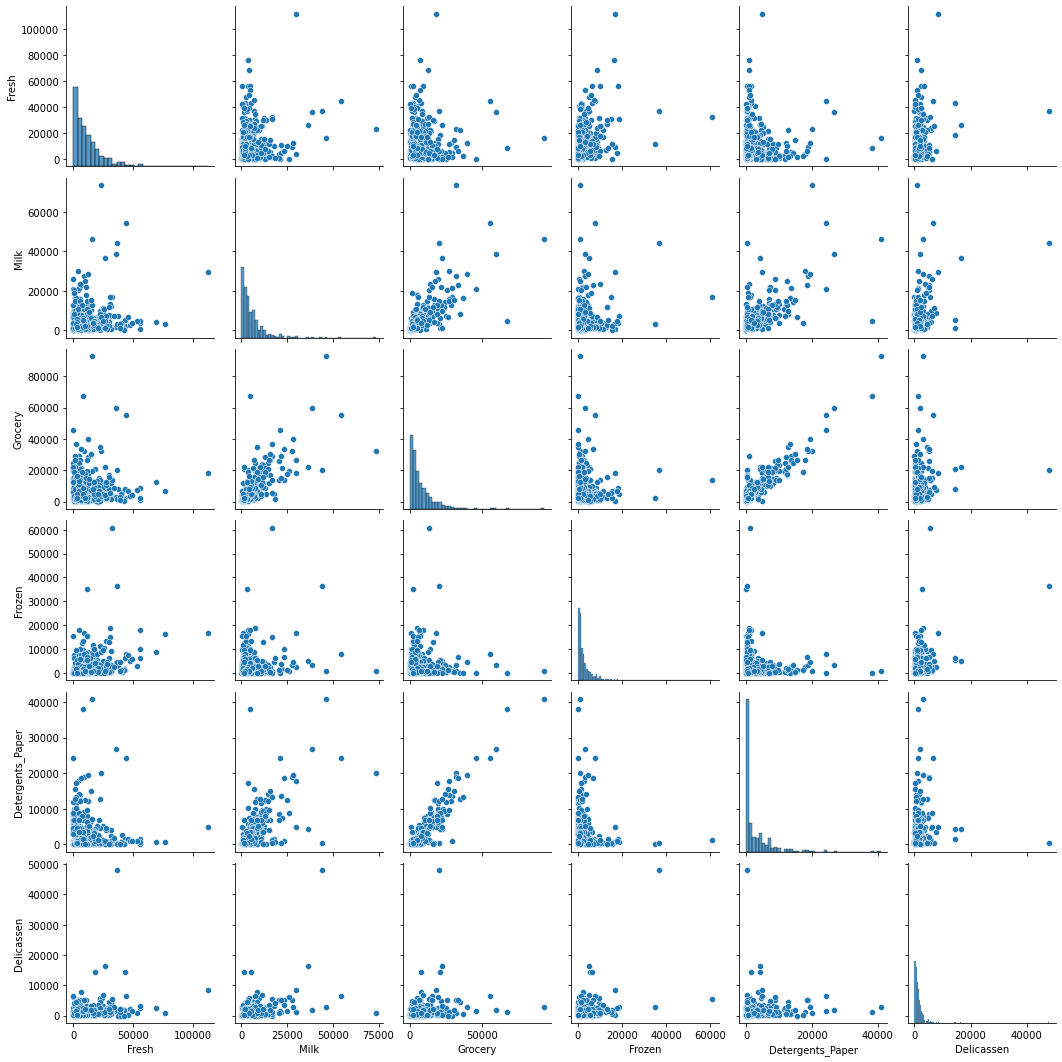

In [21]:
sns.pairplot(data=df,vars=['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])
plt.show()

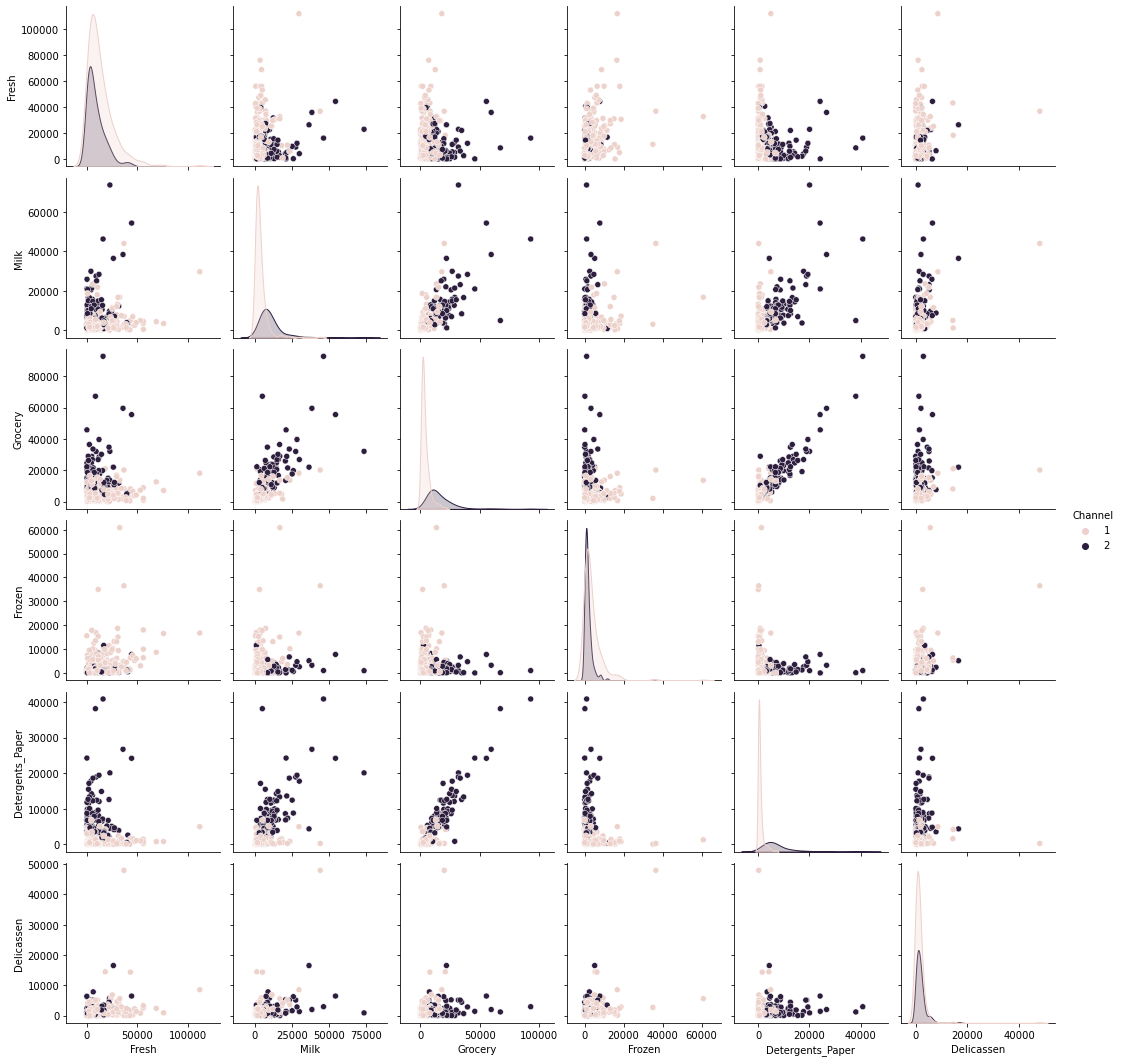

In [22]:
sns.pairplot(data=df,vars=['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],hue='Channel')
plt.show()

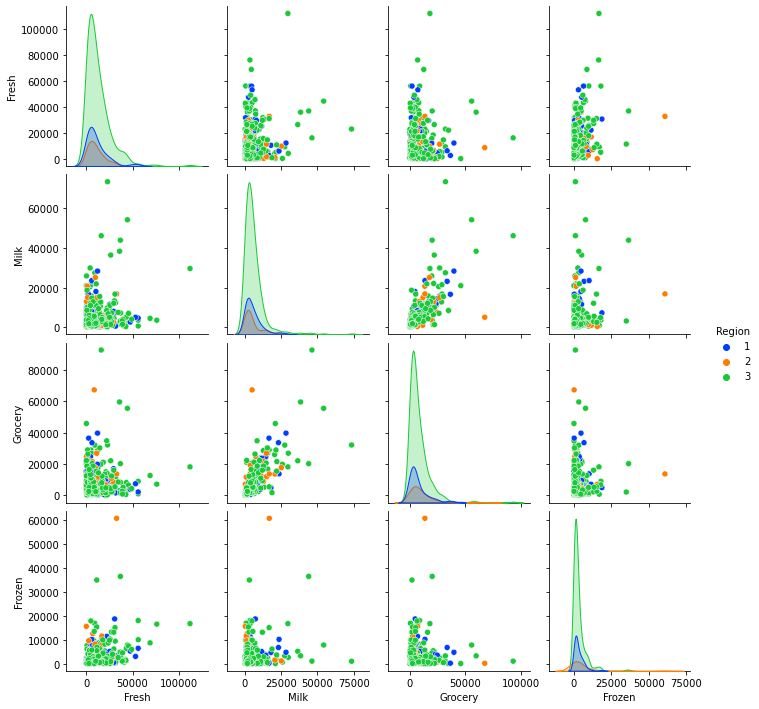

In [26]:
# sns.set_palette('bright')
sns.pairplot(data=df,vars=['Fresh', 'Milk', 'Grocery', 'Frozen'],
             hue='Region',palette='bright')
plt.show()
# palette - Set1,Set2,Set3,Coolwarm,RdBu

#### Corr

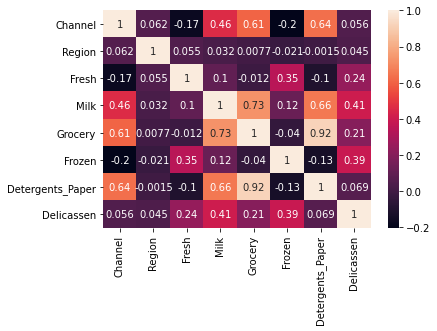

In [27]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

#### Inference
The columns are not highly correlated

#### Outlier Treatment

In [31]:
df.iloc[:,2:].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.90,0.91,0.92,0.95,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,90%,91%,92%,95%,98%,99%,max
Fresh,440.0,12000.297727,12647.328865,3.0,28.46,134.94,203.23,274.56,401.90,8504.0,27090.5,28075.44,29725.88,36818.50,46047.66,56082.61,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,255.56,336.12,494.44,567.32,593.75,3627.0,12229.9,12785.35,13250.56,16843.40,27659.88,37610.06,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,259.82,524.10,586.36,691.96,851.45,4755.5,18910.1,19831.19,20386.16,24033.50,32437.84,43435.74,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,43.95,72.02,101.40,130.56,136.85,1526.0,7545.3,8007.56,8305.88,9930.75,15807.14,17964.82,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,9.39,23.90,43.17,52.68,63.70,816.5,7438.3,7849.85,8672.64,12043.20,17927.88,22571.61,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,7.39,21.12,46.00,56.56,63.95,965.5,2945.9,3108.92,3181.88,4485.40,6276.84,8274.66,47943.0


In [36]:
print(df[df['Fresh']>27090.5].shape)
print(df[df['Fresh']>36818.50].shape)  # >95%ile
print(df[df['Delicassen']>2945.9].shape)  # >90%ile
print(df[df['Milk']>12229.9].shape)

(44, 8)
(22, 8)
(44, 8)
(44, 8)


In [37]:
def outlier_clip(x):
    x = x.clip(upper= x.quantile(0.90))
    return x

In [38]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [39]:
cols_with_outliers = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

In [40]:
df[cols_with_outliers] = df[cols_with_outliers].apply(outlier_clip)

In [52]:
x = df.drop('Channel',axis=1)
y = df['Channel']
print(x.shape)
print(y.shape)

(440, 7)
(440,)


In [53]:
y[y==2] = 0
y.value_counts()

<ipython-input-53-760e1adaab52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==2] = 0


1    298
0    142
Name: Channel, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(330, 7)
(110, 7)
(330,)
(110,)


#### Model Building

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [58]:
from xgboost import XGBClassifier
import xgboost

In [61]:
m1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                  n_estimators=100,max_depth=4,reg_lambda=0.2,eta=0.3,
                  gamma=0.5, use_label_encoder=False,random_state=30)
model_metrics(m1,x_train,x_test,y_train,y_test)

Training score 0.996969696969697
Testing score 0.8909090909090909
Predictions [1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1]
[[29  3]
 [ 9 69]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.96      0.88      0.92        78

    accuracy                           0.89       110
   macro avg       0.86      0.90      0.87       110
weighted avg       0.90      0.89      0.89       110



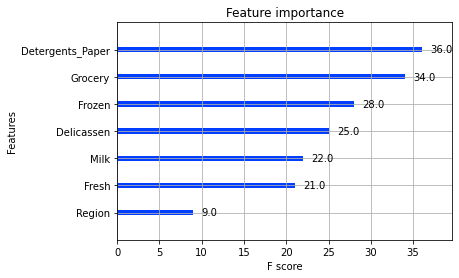

In [60]:
xgboost.plot_importance(m1)
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'gamma':[0.1,0.2,0.3,0.5],
         'eta':[0.1,0.2,0.3,0.4],
         'reg_lambda':[0.1,0.2,0.3],
          'max_depth':[4,5,6]
         }
print(params)

{'gamma': [0.1, 0.2, 0.3, 0.5], 'eta': [0.1, 0.2, 0.3, 0.4], 'reg_lambda': [0.1, 0.2, 0.3], 'max_depth': [4, 5, 6]}


In [ ]:
print(y_train.value_counts())

In [65]:
m2 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                  use_label_encoder=False)
gs = GridSearchCV(estimator=m2,param_grid=params,
                  scoring='accuracy',cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0.1, 0.2, 0.3, 0.5], 'max_depth': [4, 5, 6],
                         'reg_lambda': [0.1, 0.2, 0.3]},
             scoring='accuracy')

In [66]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'eta': 0.2, 'gamma': 0.3, 'max_depth': 6, 'reg_lambda': 0.2}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, eval_metric='logloss', gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.2, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)
0.9272727272727274


In [67]:
print(y_train.value_counts())

1    220
0    110
Name: Channel, dtype: int64


In [69]:
m3 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                  n_estimators=100,max_depth=6,reg_lambda=0.2,eta=0.2,
                  gamma=0.3, use_label_encoder=False,random_state=30)
model_metrics(m3,x_train,x_test,y_train,y_test)

Training score 0.996969696969697
Testing score 0.9181818181818182
Predictions [1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1]
[[29  3]
 [ 6 72]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.96      0.92      0.94        78

    accuracy                           0.92       110
   macro avg       0.89      0.91      0.90       110
weighted avg       0.92      0.92      0.92       110



In [ ]:
#### ML, DL - 
# 

In [ ]:
#### Model Deployment

1) Web App - Django,Flask, Streamlit,Fast API
2) Android App - Flutter, React Native, Tensorlite
3) Ios app - Swift
4) Cloud Deployment
    a) AWS
    b) Azure
    c) GCP
    
5) Model Retrain



Data Scientist
1) Excel,SQL, NO SQL, Python, R, Data Scicnce, ML,DL,
2) Cloud
3) Big data, hadoop, spark
4) Web development/Mobile(Android, IOS) App
